In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
tf.__version__

'2.6.0'

In [43]:
keras.__version__

'2.6.0'

In [44]:
fashion_mnist=keras.datasets.fashion_mnist

In [45]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [46]:
X_train_full.shape

(60000, 28, 28)

When we load data using keras instead of sklearn then every image is represented as a 28X28 array instead of a 1D array of 784 pixel

In [47]:
X_train_full.dtype

dtype('uint8')

In [48]:
X_test.shape

(10000, 28, 28)

Data is already splitted into training set and testing set but there is no validation set so we have to create one.
Since we are going to train the neural network using gradient descent , we must scale the input features

To scale we will just divide the pixel intensities down to 0-1 range by dividing them by 255.0 and this will also convert them to float

In [49]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [50]:
X_valid.shape

(5000, 28, 28)

In [51]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [52]:
class_names[y_train[0]]

'Coat'

In [53]:
y_train[0]

4

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

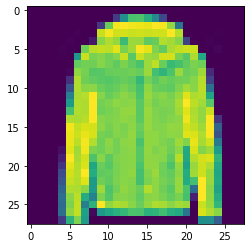

In [55]:
plt.imshow(X_train[0])

### Creating a model using sequential API

In [56]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [57]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Dense layers often have a lot of parameters.For eg. the first hidden layer has 700*300 connection weights plus 300 bias terms which makes it 235500 parameter.

In [59]:
model.layers

In [60]:
model.layers[1].name

'dense_9'

In [61]:
hidden1=model.layers[1]

In [62]:
weights,biases=hidden1.get_weights()

In [63]:
weights

array([[ 0.02071983, -0.06061296, -0.0130907 , ..., -0.05419886,
         0.06866297, -0.05470303],
       [ 0.05430061, -0.01444947,  0.06948586, ..., -0.03981499,
        -0.0337628 , -0.00935232],
       [ 0.04274608, -0.0403702 ,  0.04504211, ...,  0.06134982,
         0.00379012,  0.00702365],
       ...,
       [-0.04467793,  0.01537721, -0.02234567, ...,  0.02026678,
         0.01995296, -0.05200728],
       [ 0.05680716, -0.02618955,  0.04684611, ..., -0.00082882,
        -0.07300171, -0.04058744],
       [-0.07358176, -0.00382453,  0.01550565, ..., -0.04012865,
         0.07223968,  0.02969276]], dtype=float32)

In [64]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Compiling the model

In [65]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [66]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6966 - accuracy: 0.7735 - val_loss: 0.4937 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4829 - accuracy: 0.8298 - val_loss: 0.4398 - val_accuracy: 0.8554
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4411 - accuracy: 0.8463 - val_loss: 0.4403 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4158 - accuracy: 0.8547 - val_loss: 0.4148 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3950 - accuracy: 0.8614 - val_loss: 0.4080 - val_accuracy: 0.8568
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3792 - accuracy: 0.8678 - val_loss: 0.3666 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3658 - accuracy: 0.8715 - val_loss: 0.3957 - val_accuracy:

In [67]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [68]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [69]:
import pandas as pd

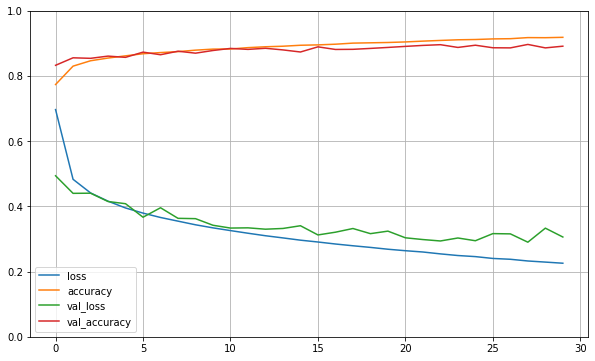

In [70]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Both training and validation accuracy steadily increase during training while training and validation loss decrease

### Evaluation

In [71]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 66.8341 - accuracy: 0.8500


[66.83409118652344, 0.8500000238418579]

### Predictions

In [75]:
X_new=X_test[:5]

In [76]:
y_prob=model.predict(X_new)

In [77]:
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [81]:
import numpy as np

In [82]:
predict_x=model.predict(X_new) 
classes_x=np.argmax(predict_x,axis=1)

In [83]:
classes_x

array([9, 2, 1, 1, 6], dtype=int64)

In [84]:
y_new=y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)